Student ID : 202518045
Student name: Shrey Pandya

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Task 1: EDA

In [83]:
df = pd.read_csv("C:\\Users\\shrey\\Downloads\\Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [84]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"].isnull().sum()

np.int64(11)

Only the feature "TotalCharges" has missing values i.e 11 missing values. The extent of missing values in small compared to the total rows so it can be imputed using average or the median.

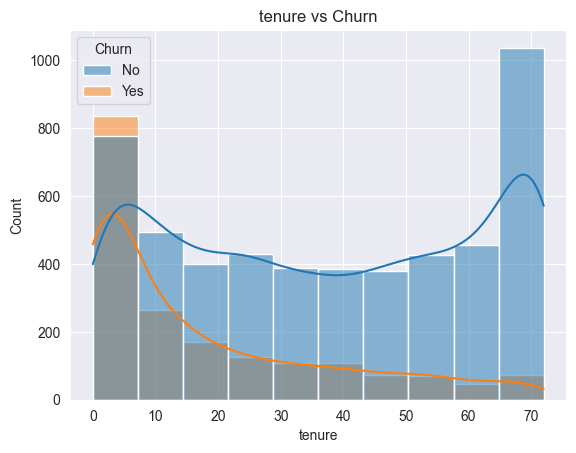

In [85]:
sns.histplot(data = df, x = "tenure" , hue = "Churn", kde = True, bins = 10)
plt.title("tenure vs Churn")
plt.show()

From the above histrogram it can be observed that the chruners are the ones who have had very short tenure with the company and that, As the tenure increases the customers churning decreases.

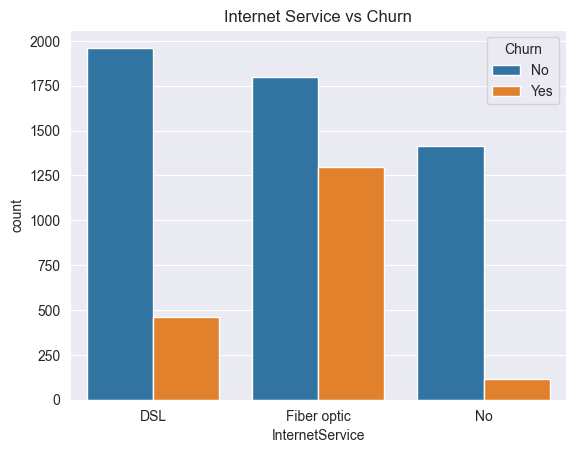

In [86]:
sns.countplot(data = df, x = "InternetService", hue = "Churn")
plt.title("Internet Service vs Churn")
plt.show()

From the above plot we can observe that the users/customers with the fiber optic internet service tend to churn more than those who either use DSL type or no internet services from the company.

Task 2: Feature engineering

In [87]:
#To check if the customer has a long term contract or not
df["LongTermContract"] = df["Contract"].apply(lambda x: 0 if x == "Month-to-month" else 1)

In [88]:
#To check which customers has the multiple ongoing services

# Define the service-related columns
service_cols = ["PhoneService", "InternetService", "OnlineSecurity", "OnlineBackup","DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

# Replace Yes/No and "No service" with numbers, then convert to int
df_services = (df[service_cols].replace({"Yes": 1, "No": 0, "No internet service": 0, "No phone service": 0}).apply(pd.to_numeric, errors="coerce").fillna(0))

# Create new feature: number of services used
df["NumServices"] = df_services.sum(axis=1).astype(int)

C:\Users\shrey\AppData\Local\Temp\ipykernel_13220\1479775646.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_services = (df[service_cols].replace({"Yes": 1, "No": 0, "No internet service": 0, "No phone service": 0}).apply(pd.to_numeric, errors="coerce").fillna(0))


In [89]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

Task 3: Building end-to-end pipeline

In [90]:
df = df.drop(["customerID"], axis = 1)

In [91]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,LongTermContract,NumServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,1,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,1,6
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1,5
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0,1


In [92]:
x = df.drop(["Churn"], axis = 1)
y = df["Churn"].map({"Yes": 1, "No": 0})

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
#we use stratify=y to maintain the same proportion of churned customers in both training and testing sets.

In [94]:
num_features = x.select_dtypes(include=[np.number]).columns
cat_features = x.select_dtypes(exclude=[np.number]).columns

num_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])

cat_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("encoder", OneHotEncoder(handle_unknown="ignore"))])

In [95]:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),("cat", cat_transformer,cat_features)])

In [96]:
#demonstrating that the pipeline can be successfully trained
pipe = Pipeline(steps=[("preprocessor", preprocessor),("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))])

pipe.fit(x_train, y_train)
print("Initial Logistic Regression Score:", pipe.score(x_test,y_test))

Initial Logistic Regression Score: 0.7381121362668559


Task 4: Model Selection and Hyperparameter Tuning

In [97]:
models = {"Logistic Regression": LogisticRegression(class_weight="balanced",random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)}

for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    pipe.fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    print(f"\n{name} Report:\n", classification_report(y_test,y_pred))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1035
           1       0.61      0.47      0.53       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409


Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74   

From the above calculation we can observe that the weighted average of the f1-score, precision, recall is highest in the Gradient Boosting hence we would use the Gradient boosting classifier.

In [98]:
param_grid = {
    "classifier__n_estimators": [100, 200, 300],   # number of trees
    "classifier__max_depth": [3,4,5]   # tree depth
}

In [99]:
gb_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", GradientBoostingClassifier(random_state=42))])

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as rf

grid_gb = GridSearchCV(
    gb_pipe,
    param_grid=param_grid,
    cv=3,
    scoring="f1_weighted",n_jobs=-1)

In [101]:
grid_gb.fit(x_train, y_train)

print("Best GB hyperparameters:", grid_gb.best_params_)
print("Best GB score:", grid_gb.best_score_)

Best GB hyperparameters: {'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best GB score: 0.7938037816276884


Task 5: Handling Class Imbalance

In [102]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import cross_val_score

In [103]:
best_gbpara = grid_gb.best_params_
gb_params = {k.split("__")[1]: v for k, v in best_gbpara.items()}
imb_pipe = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(**gb_params, random_state=42))
])

imb_pipe.fit(x_train, y_train)

f1_scores = cross_val_score(
    imb_pipe, x_train, y_train,
    cv=3,
    scoring="f1_weighted",
    n_jobs=-1
)

In [104]:
print("Original Gradient Bossting (no SMOTE) f1_weighted:", grid_gb.best_score_)
print("GB with SMOTE f1_weighted :", f1_scores.mean())

Original Gradient Bossting (no SMOTE) f1_weighted: 0.7938037816276884
GB with SMOTE f1_weighted : 0.794699209002545


From the above calculation we observe that the GB classification obtains better outcomes after handling the class imbalance using SMOTE tha that of without using SMOTE as we see the f1 weightage score in both the cases, it can be concluded that using SMOTE can help handling the class imbalance and provide with efficient outcomes.

Task 6: Final Evaluation And Interpretation

In [105]:
y_pred = imb_pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.62       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [106]:
#ROC AUC
print("ROC AUC:", roc_auc_score(y_test, imb_pipe.predict_proba(x_test)[:,1]))

ROC AUC: 0.8415768942623162


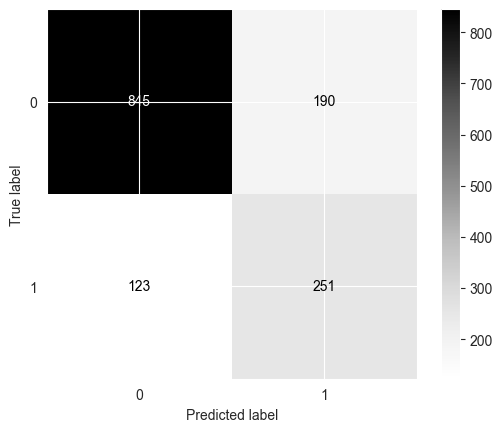

In [107]:
#confusion matrix
ConfusionMatrixDisplay.from_estimator(imb_pipe, x_test, y_test, cmap="Grays")
plt.show()

From the above confusion matrix the customer churn is more dangerous in the case of False negative i.e when a customer is suspected not to churn but is actually churning i.e 123 true label(0) and predicted label(1) in this case. We need to minimize this in order to make our model more efficient.

In [108]:
importances = imb_pipe.named_steps["classifier"].feature_importances_
feature_names = imb_pipe.named_steps["preprocessor"].get_feature_names_out()
clean_names = [name.split("__")[-1] for name in feature_names]
feat_imp = pd.Series(importances, index=clean_names).sort_values(ascending=False).head(10)

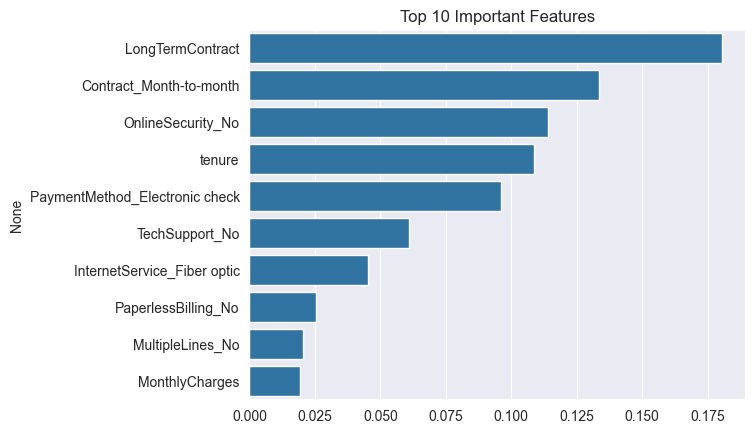

In [109]:
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Important Features")
plt.show()

From the above plot we observe the main drivers of the customer churning which are LongTermContract, Contract_Month-to-month and so on. As we go lower in terms of attributes i.e from LongTermContract towards MonthlyCharges the probability of its role in prediction of the churn decreases.